In [1]:
import numpy as np
import pandas as po
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from filepaths import fp

In [4]:
df = po.read_csv('data/raw/EnergyConsumption_Theft.csv')
df

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.12,9.96,16.92,7.60,27.160942,18.05,26.47,18.750000,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.50,9.99,11.78,18.59,26.800000,18.57,14.59,12.820000,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.230000,14.68,16.35,18.140000,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.25,3.56,3.38,4.39,3.720000,3.77,3.96,3.640000,3.40,4.38
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.310000,4.58,3.33,3.190000,4.57,4.00
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,...,0.33,0.66,2.92,2.36,3.860000,4.28,3.37,5.085875,2.44,1.15
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,...,21.13,13.75,22.61,18.83,25.520000,18.11,19.31,17.480000,17.20,15.28


In [6]:
flag_col = df['FLAG'].copy()

In [7]:
df = df.drop(['FLAG', 'CONS_NO'], axis=1)
df_copy = df.copy()

In [8]:
scaler = MinMaxScaler().fit(df)
df = po.DataFrame(scaler.transform(df), columns=df_copy.columns)
df

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001600,0.001361,0.001156,0.001139,0.001664,0.001056,0.001399,0.001045,0.001068,0.000803
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001028,0.001365,0.000805,0.002786,0.001642,0.001086,0.000771,0.000715,0.001159,0.000857
4,0.000874,0.000862,0.000867,0.001342,0.000586,0.001342,0.000975,0.000966,0.001031,0.000261,...,0.002810,0.001417,0.001046,0.002025,0.000749,0.000858,0.000864,0.001011,0.001102,0.000932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000672,0.000486,0.000231,0.000658,0.000228,0.000220,0.000209,0.000203,0.000203,0.000236
42368,0.000814,0.001107,0.000899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000761,0.000665,0.000306,0.000550,0.000203,0.000268,0.000176,0.000178,0.000273,0.000215
42369,0.000175,0.000212,0.000367,0.000264,0.000099,0.000259,0.000225,0.000008,0.000221,0.000516,...,0.000052,0.000090,0.000199,0.000354,0.000237,0.000250,0.000178,0.000283,0.000146,0.000062
42370,0.005090,0.003490,0.003074,0.004277,0.002380,0.003896,0.003881,0.004655,0.004071,0.006004,...,0.003341,0.001878,0.001544,0.002822,0.001564,0.001059,0.001020,0.000974,0.001029,0.000823


In [9]:
cols = list(df.columns)

In [15]:
cols_dates = []
for c in cols:
    dt_obj = datetime.strptime(c, "%Y/%m/%d")
    cols_dates.append(dt_obj)

In [16]:
cols_dates.sort()

In [23]:
cols = []
for c in cols_dates:
    cols.append(c.strftime("%Y/%-m/%-d"))

In [25]:
df = df[cols]

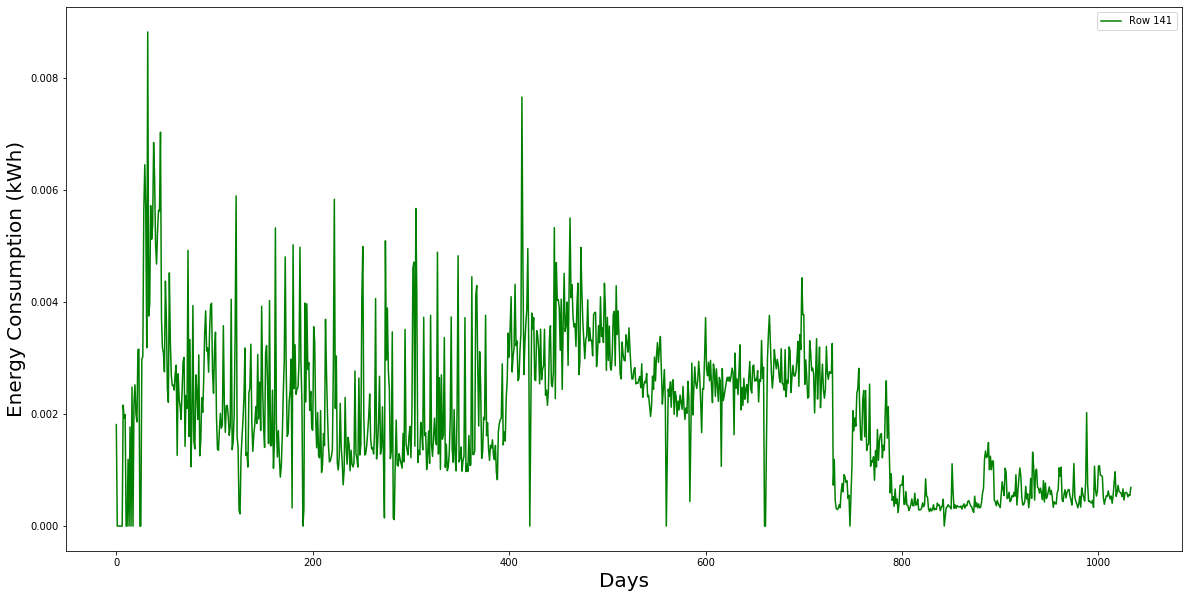

In [29]:
row = 141
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

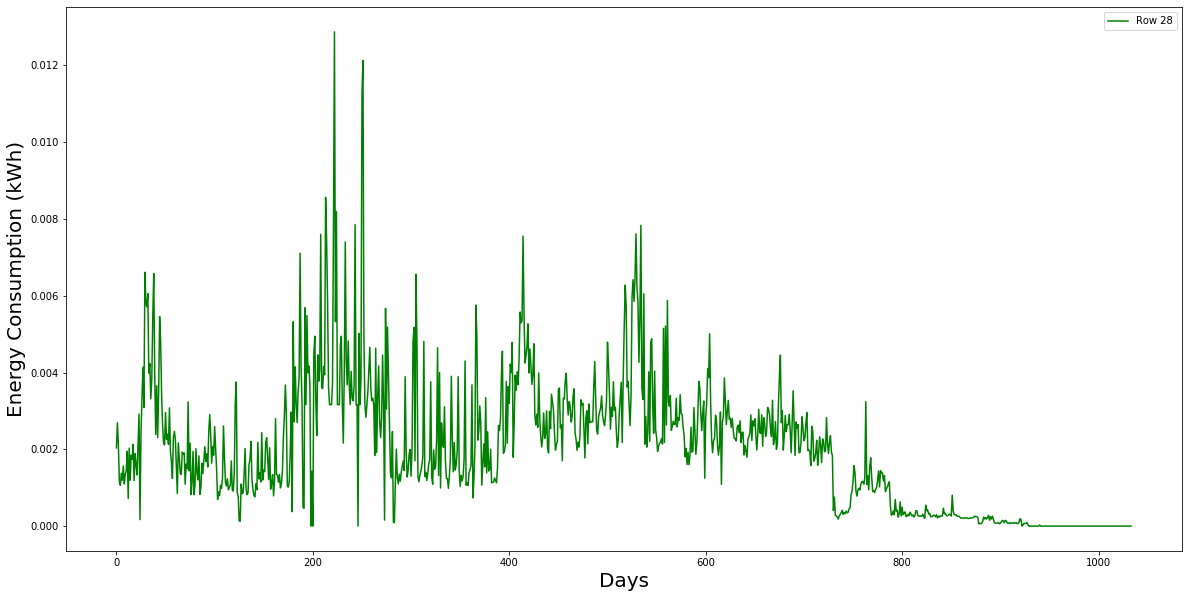

In [30]:
row = 28
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

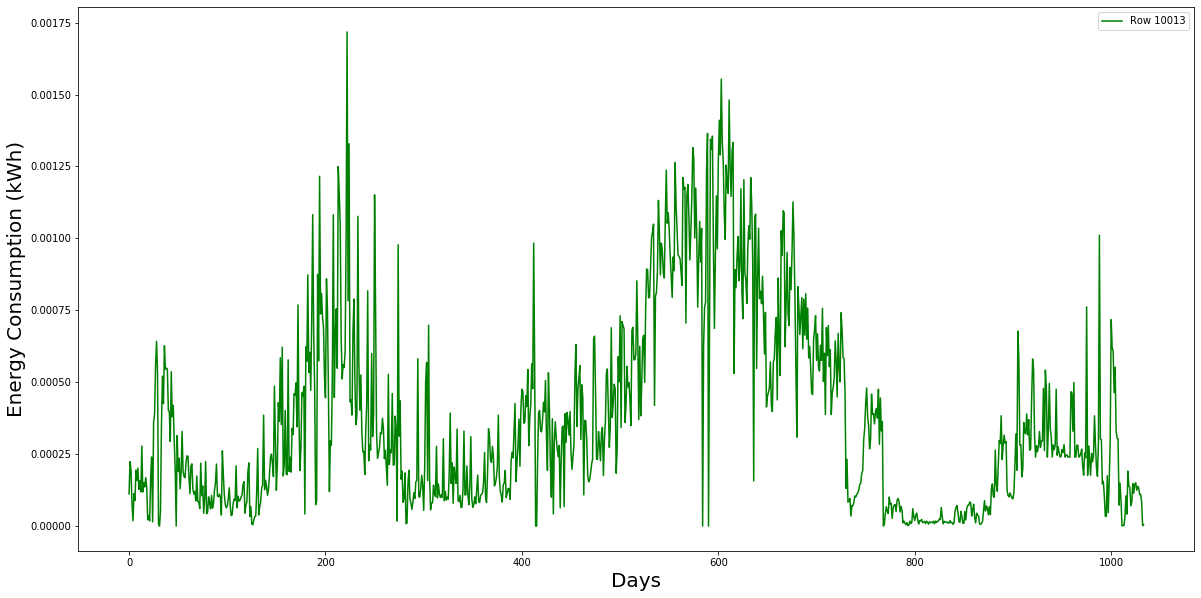

In [38]:
row = 10013
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

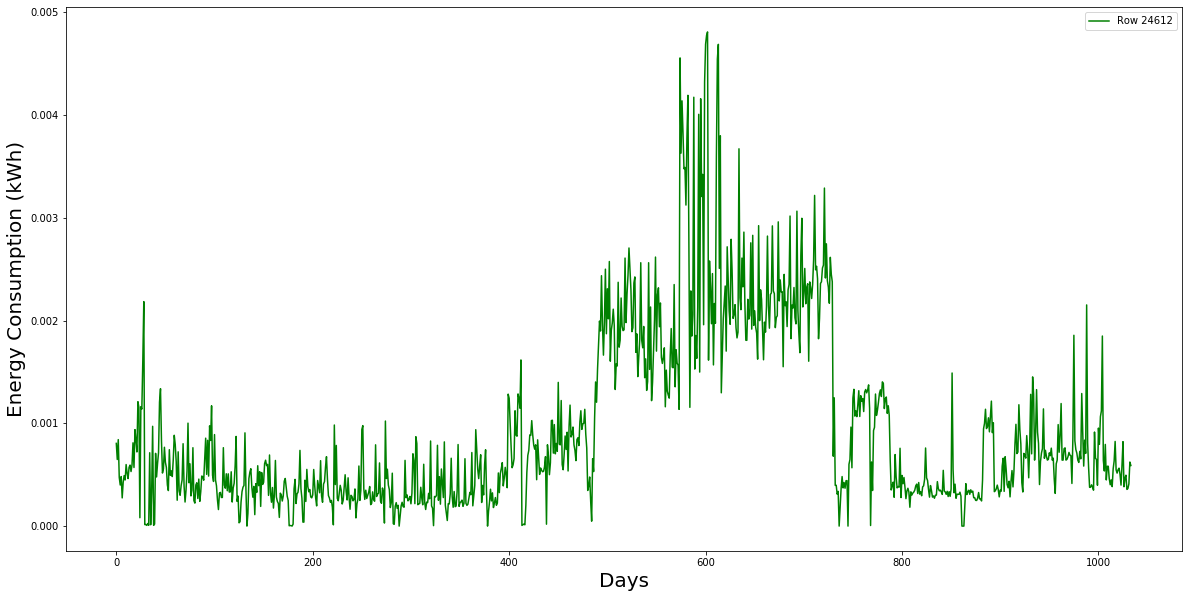

In [40]:
row = 24612
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

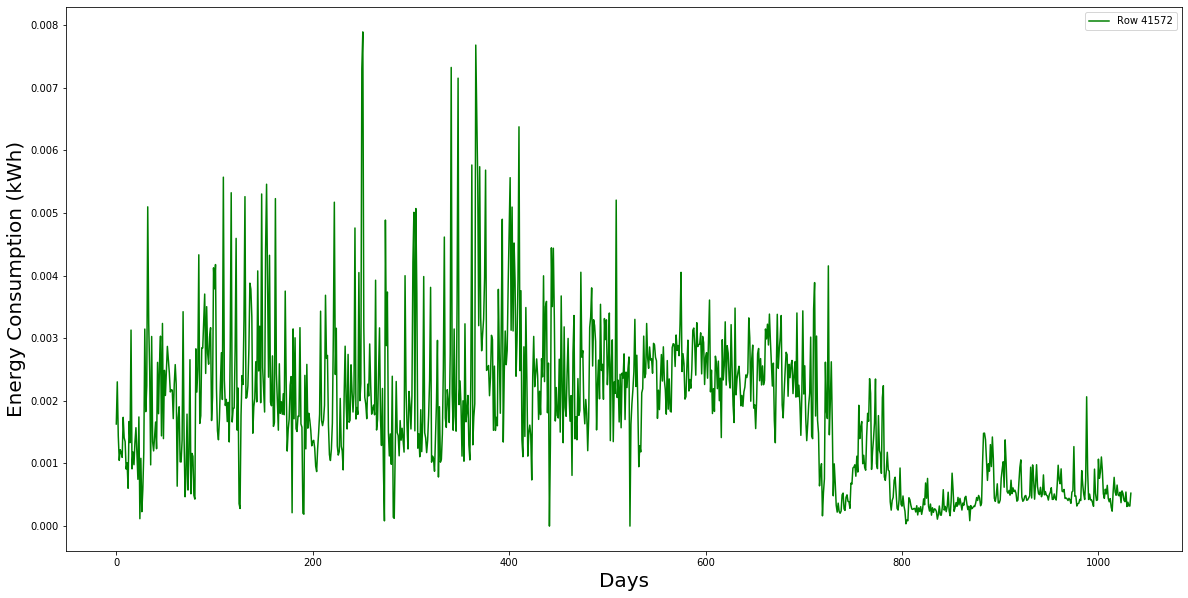

In [45]:
row = 41572
plt.figure(figsize=(20, 10))
plt.plot(df.iloc[row].to_list(), color='green')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Row {}'.format(row)])
plt.savefig('plots/data_analysis/row{}.png'.format(row))

In [46]:
df['FLAG'] = flag_col

In [104]:
df.to_csv('data/processed/EnergyConsumption_normalized.csv', index=False)

In [4]:
df = po.read_csv('data/processed/EnergyConsumption_normalized.csv')

In [5]:
df_0 = df[df['FLAG'] == 0].drop('FLAG', axis=1).reset_index(drop=True) # Normal user
df_1 = df[df['FLAG'] == 1].drop('FLAG', axis=1).reset_index(drop=True) # Abnormal user (energy thief)

In [6]:
len(df_0)

38757

In [7]:
len(df_1)

3615

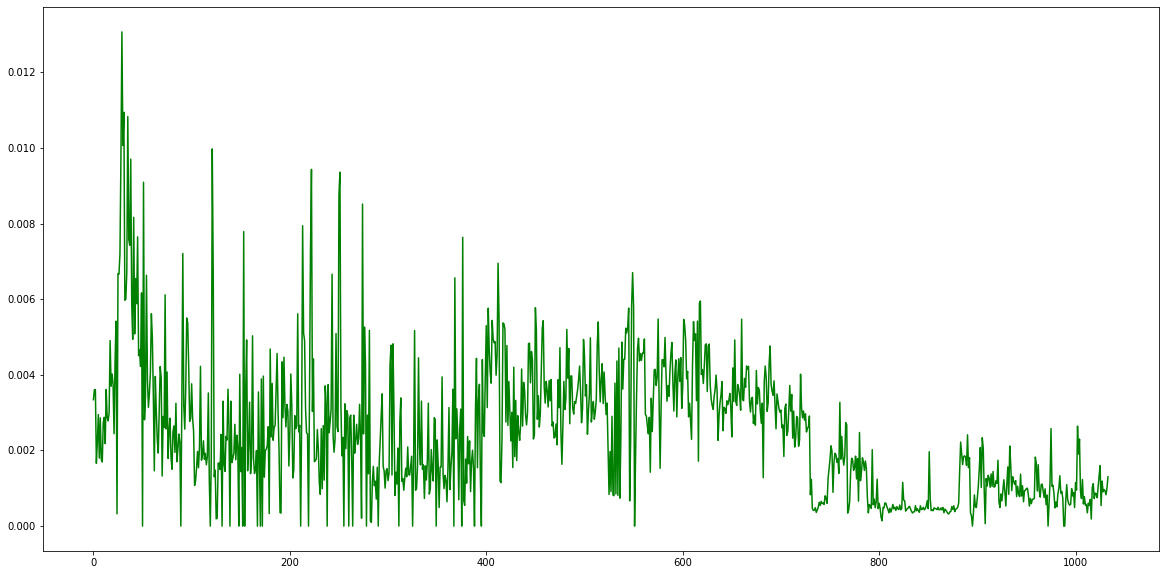

In [8]:
normal_row = 154
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

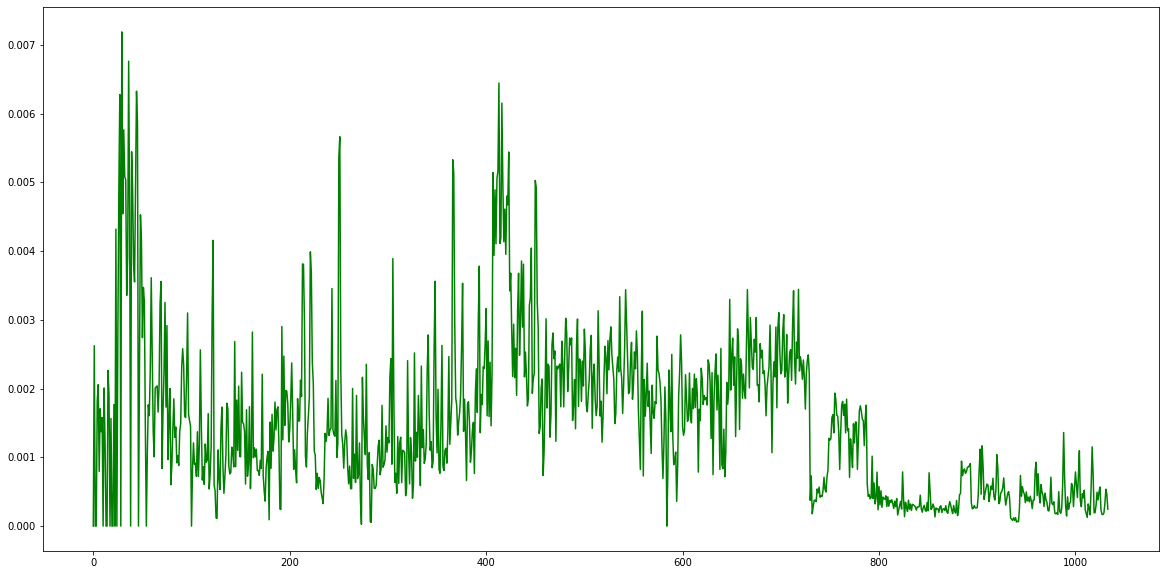

In [53]:
normal_row = 3419
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

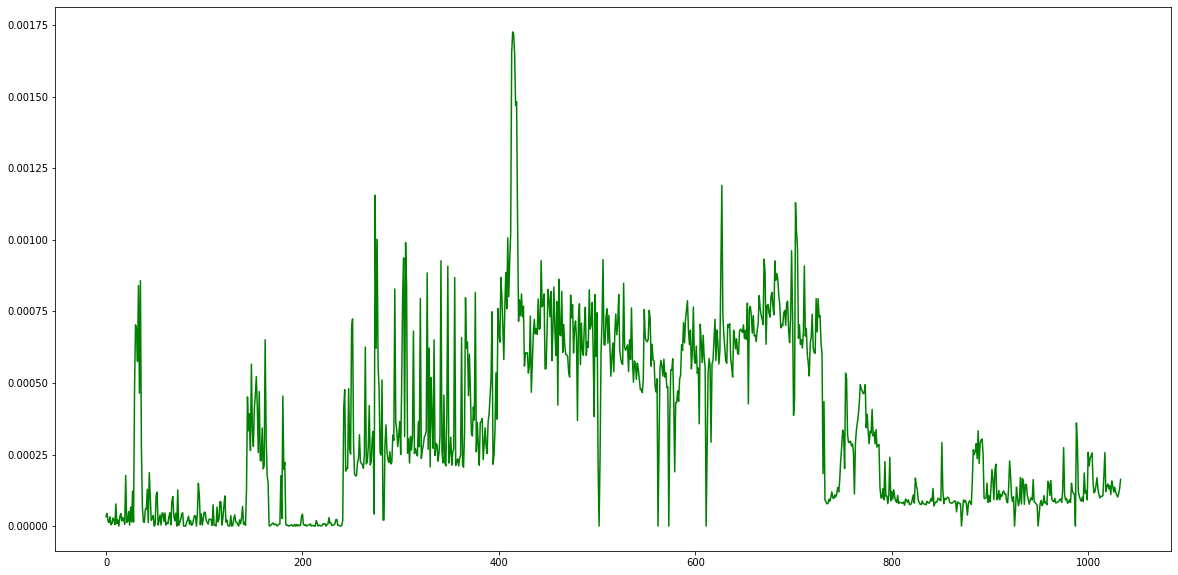

In [58]:
normal_row = 15886
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

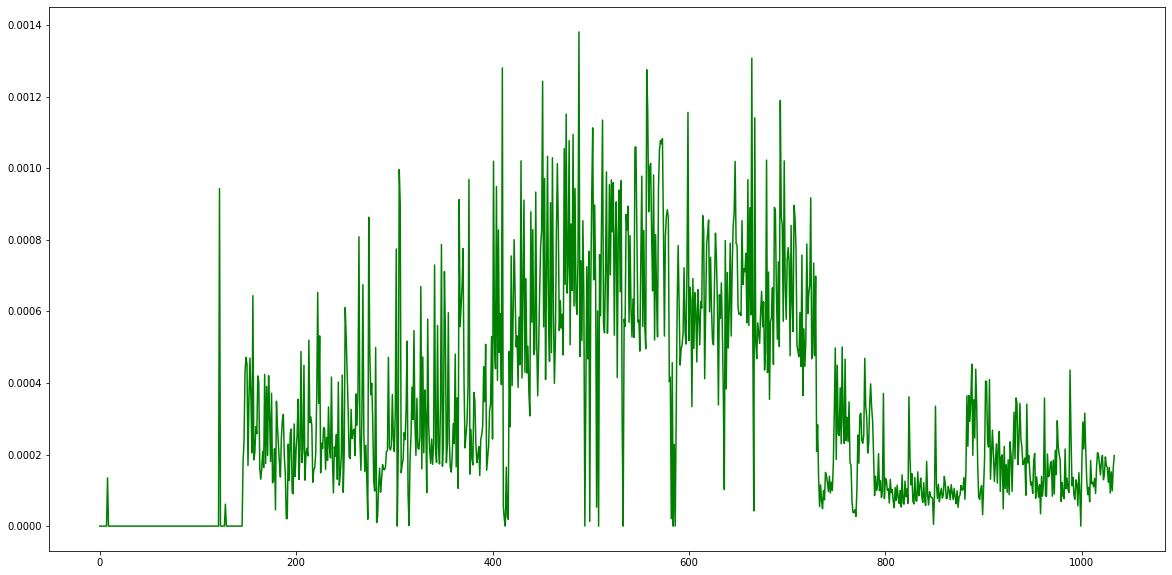

In [63]:
normal_row = 28842
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

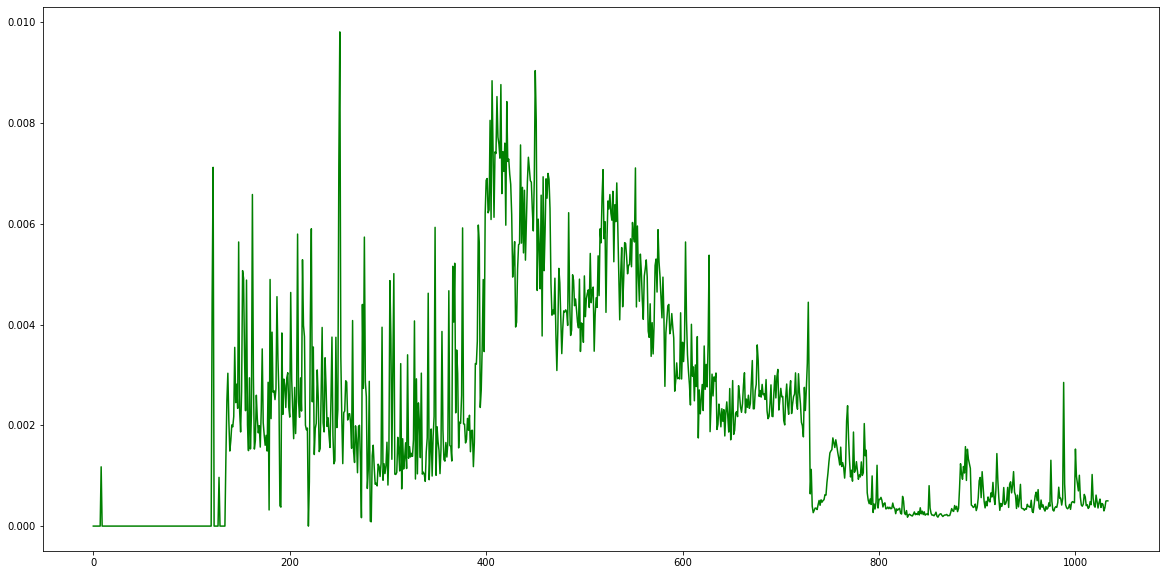

In [68]:
normal_row = 36222
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/normal_row{}.png'.format(normal_row))

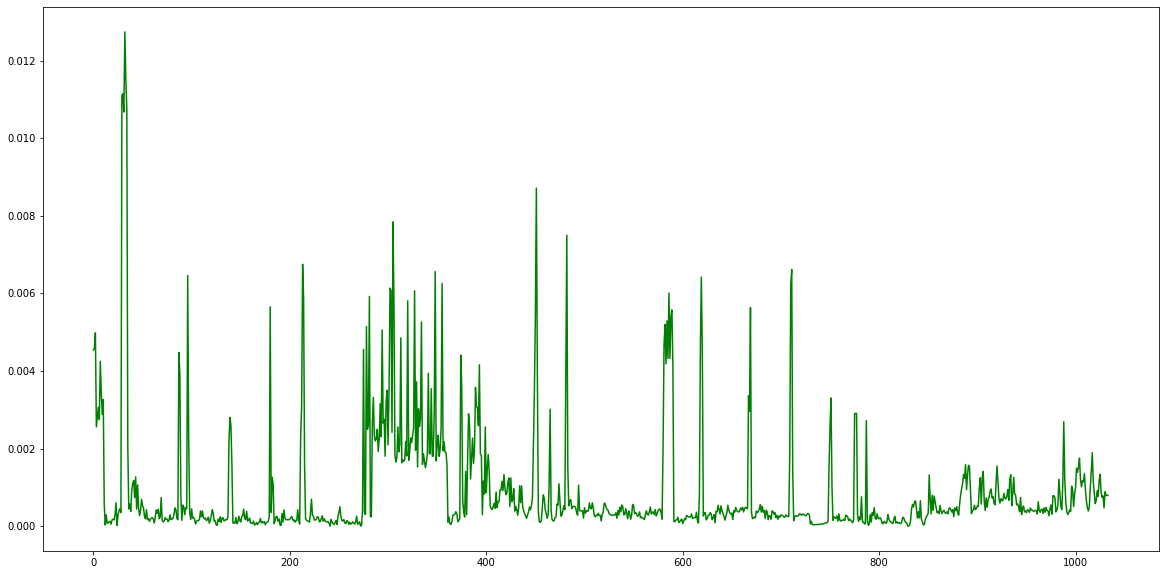

In [91]:
abnormal_row = 31
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

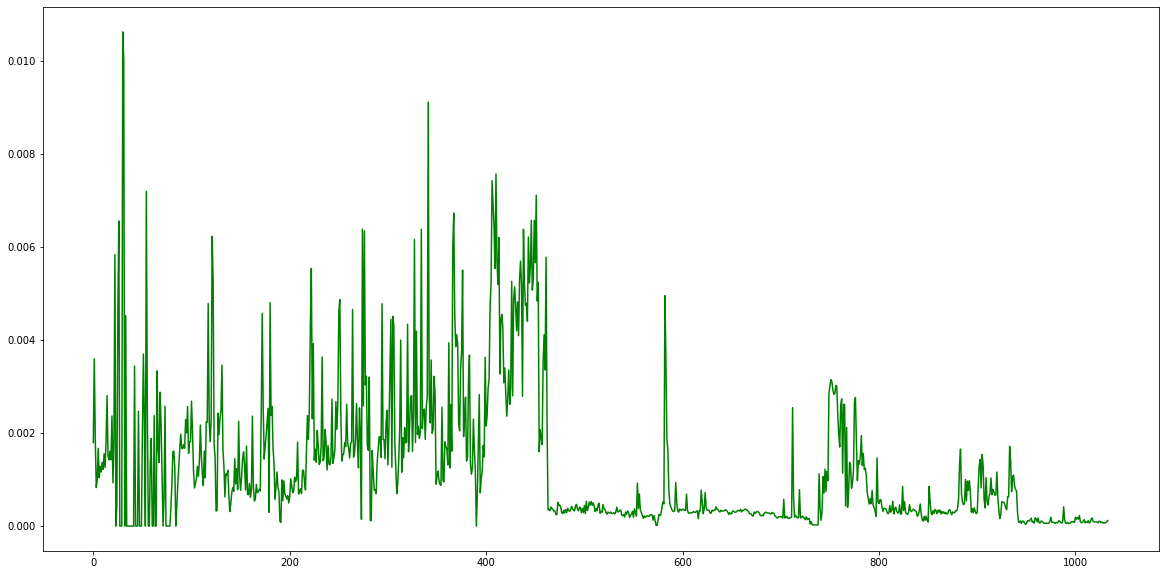

In [94]:
abnormal_row = 52
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

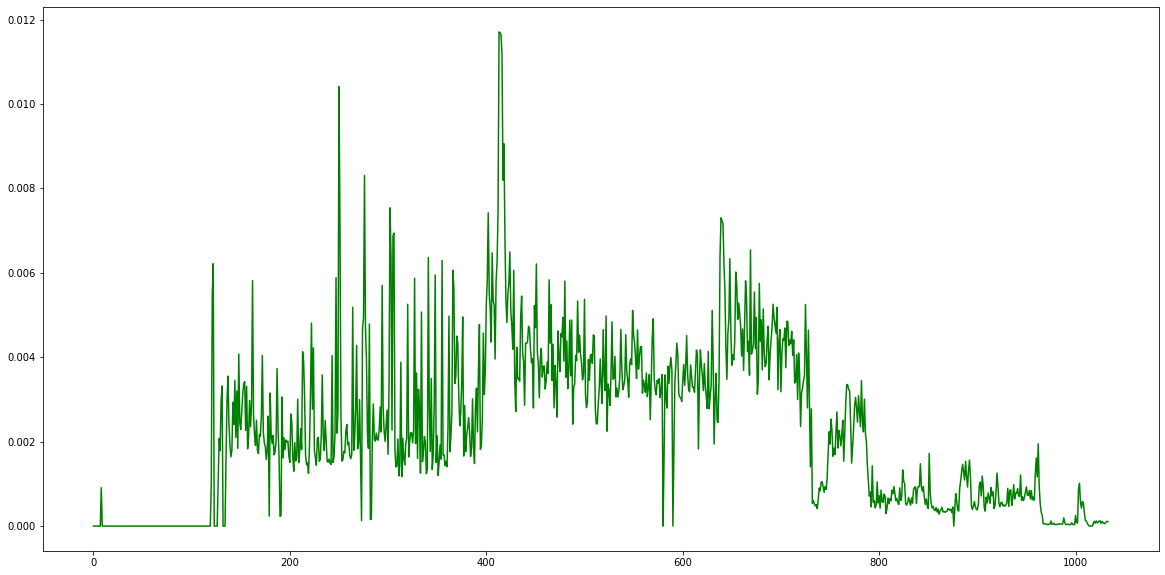

In [96]:
abnormal_row = 312
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

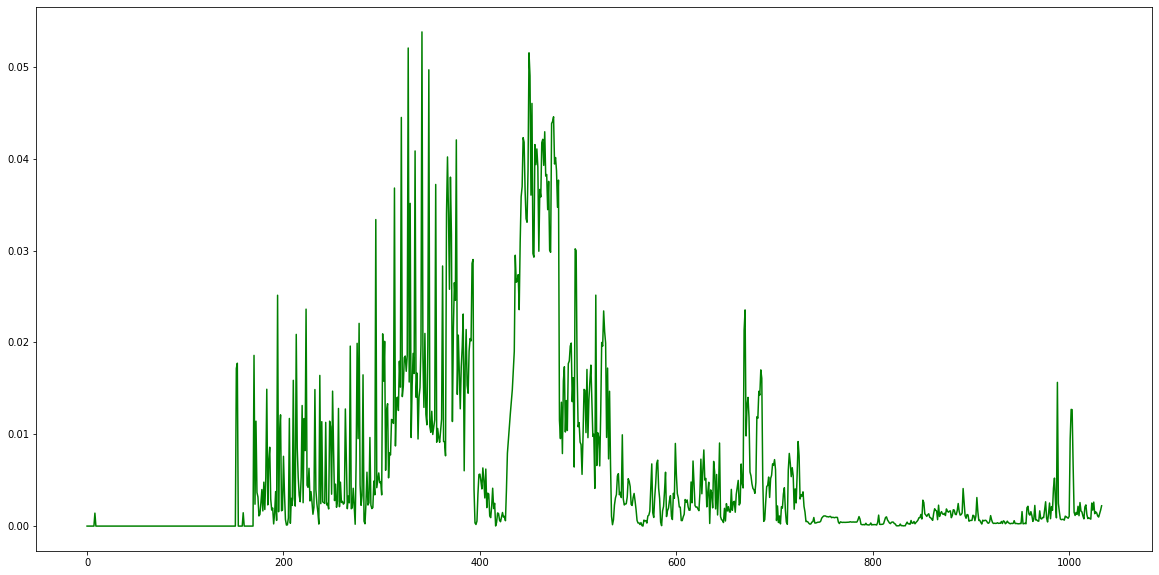

In [99]:
abnormal_row = 1325.format(abnormal_row)
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

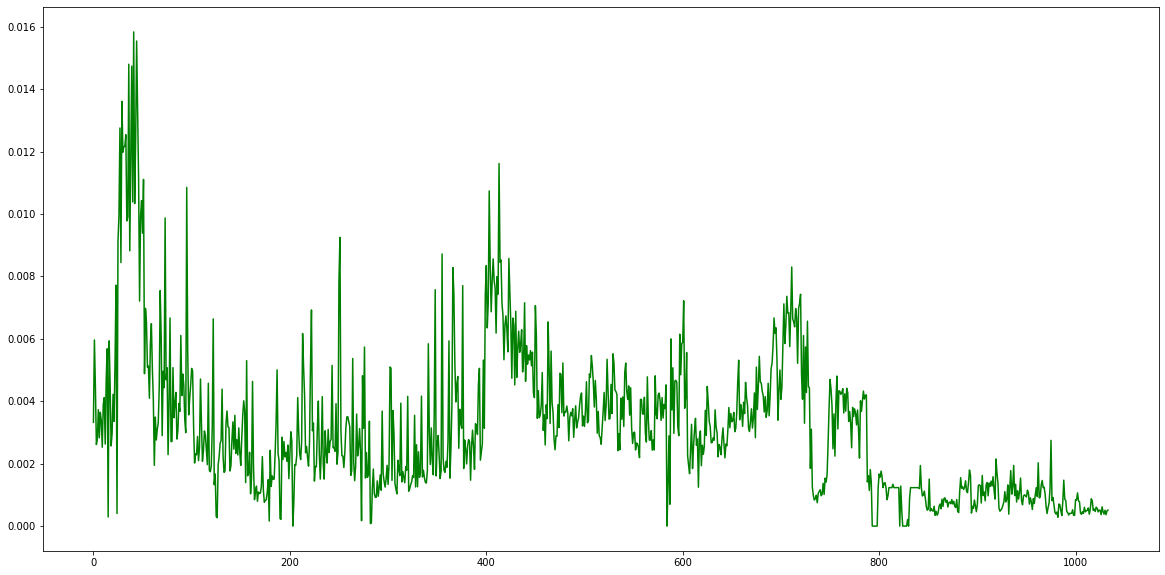

In [102]:
abnormal_row = 3297
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='green')
plt.savefig('plots/data_analysis/abnormal_row{}.png'.format(abnormal_row))

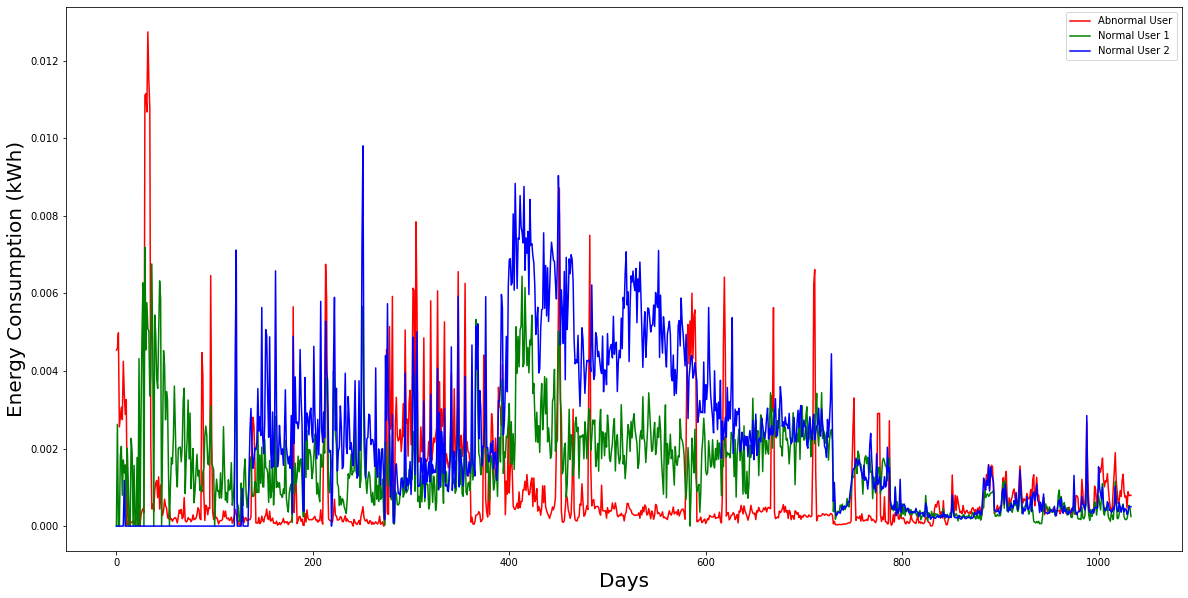

In [17]:
normal_row_1 = 3419
normal_row_2 = 36222
abnormal_row = 31
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='red')
plt.plot(df_0.iloc[normal_row_1].to_list(), color='green')
plt.plot(df_0.iloc[normal_row_2].to_list(), color='blue')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Abnormal User', 'Normal User 1', 'Normal User 2'])
plt.savefig('plots/data_analysis/normal_vs_abnormal.png')

In [11]:
col_start = cols.index('2014/11/1')
col_end = cols.index('2015/3/1')

In [13]:
col_start

62

In [15]:
col_end

516

In [83]:
cols.sort()

In [85]:
col_start

62

In [86]:
col_end

516

In [79]:
winter_1 = df[cols[col_start:col_end]]#.iloc[28]
winter_1

,2014/11/1,2014/11/10,2014/11/11,2014/11/12,2014/11/13,2014/11/14,2014/11/15,2014/11/16,2014/11/17,2014/11/18,...,2015/2/26,2015/2/27,2015/2/28,2015/2/3,2015/2/4,2015/2/5,2015/2/6,2015/2/7,2015/2/8,2015/2/9
0,0.000362,0.001598,0.000833,0.001046,1.018102e-03,0.000851,0.001023,0.000487,0.002428,0.000619,...,0.005303,0.010375,0.006094,0.005198,0.008834,0.010189,0.007860,0.005503,0.010682,0.010505
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034093,0.031051,0.037332,0.017373,0.030795,0.027685,0.028120,0.029204,0.040061,0.025947
2,0.000915,0.002529,0.002410,0.001465,8.939431e-04,0.001290,0.002089,0.002328,0.005072,0.001934,...,0.006965,0.005675,0.004580,0.002863,0.006914,0.007350,0.006442,0.008852,0.011295,0.008401
3,0.001655,0.003234,0.001194,0.001115,9.634720e-04,0.001046,0.001355,0.001345,0.003951,0.001101,...,0.003658,0.003170,0.003452,0.001642,0.003410,0.003121,0.003064,0.003172,0.003202,0.003032
4,0.000062,0.000197,0.000071,0.000081,7.118436e-05,0.000071,0.000087,0.000092,0.000232,0.000183,...,0.002346,0.002361,0.001944,0.001537,0.003740,0.004689,0.000728,0.000983,0.001228,0.001383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24363,0.000243,0.000371,0.000185,0.000108,3.973080e-05,0.000116,0.000204,0.000272,0.000221,0.000118,...,0.001759,0.002213,0.001831,0.000522,0.001861,0.001720,0.002158,0.001699,0.001615,0.001756
24364,0.000774,0.001481,0.001036,0.000663,9.502284e-04,0.000574,0.000847,0.001112,0.002472,0.000702,...,0.003902,0.004322,0.003764,0.001705,0.003257,0.004316,0.003712,0.008912,0.005976,0.003744
24365,0.000765,0.001227,0.000538,0.000615,5.198114e-04,0.000457,0.000518,0.000507,0.001540,0.000524,...,0.007393,0.007440,0.007743,0.001023,0.001773,0.001493,0.001407,0.002249,0.001704,0.001693
24366,0.000016,0.000032,0.000002,0.000002,8.277251e-07,0.000004,0.000010,0.000007,0.000014,0.000190,...,0.000005,0.000005,0.000130,0.000122,0.000147,0.000081,0.000005,0.000071,0.000139,0.000063


In [78]:
len(winter_1)

454

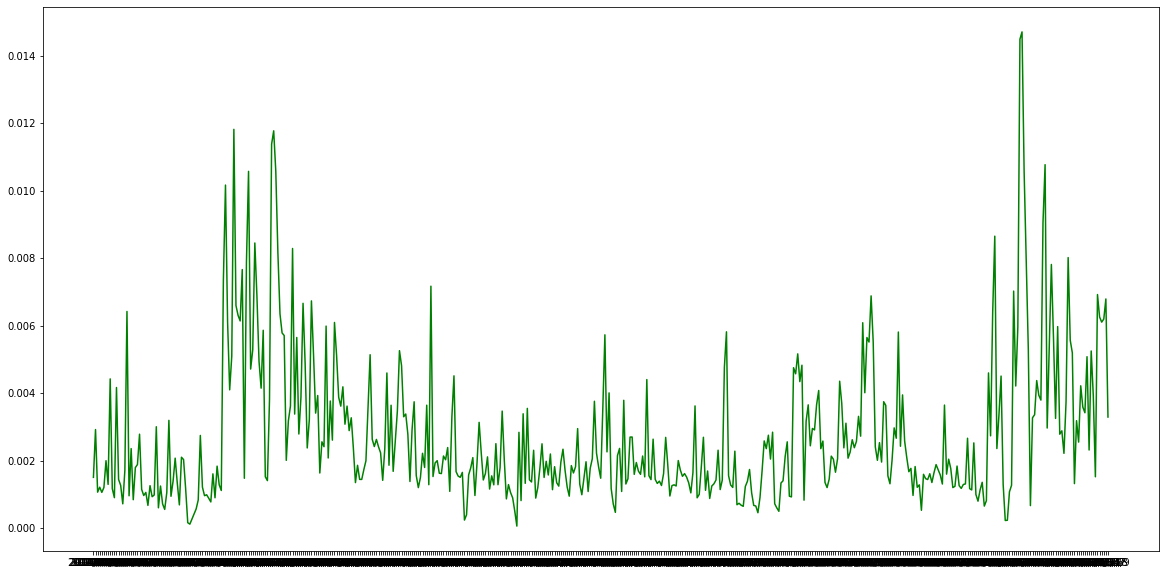

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(winter_1, color='green')

In [50]:
weekdays = []
weekends = []
for i in range(0, len(days_35), 7):
    weekdays += days_35[i:i+5] 
    weekends += days_35[i+5:i+7]

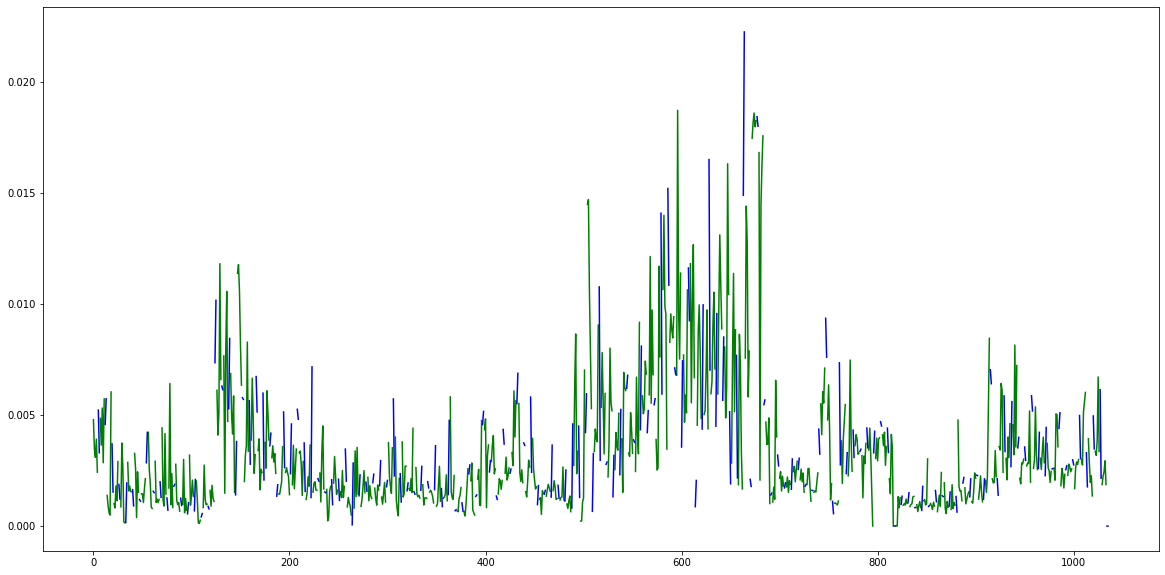

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(weekdays, color='green')
plt.plot(weekends, color='blue')
#2014/1/1      2.90

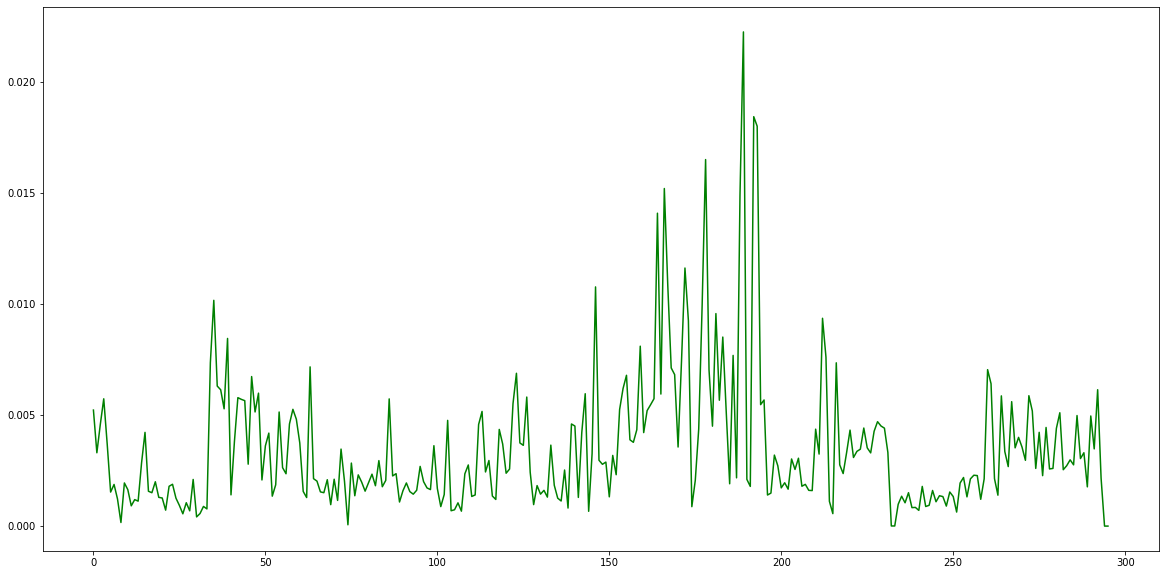

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(weekends, color='green')

In [13]:
cos_sim = cosine_similarity(df_0.to_numpy(), df_1.to_numpy())

In [14]:
np.argmax(cos_sim[:, 4])

17753

In [25]:
df.columns

Index(['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13',
       '2014/1/14', '2014/1/15', '2014/1/16', '2014/1/17', '2014/1/18',
       ...
       '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4', '2016/9/5',
       '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9', 'FLAG'],
      dtype='object', length=1035)

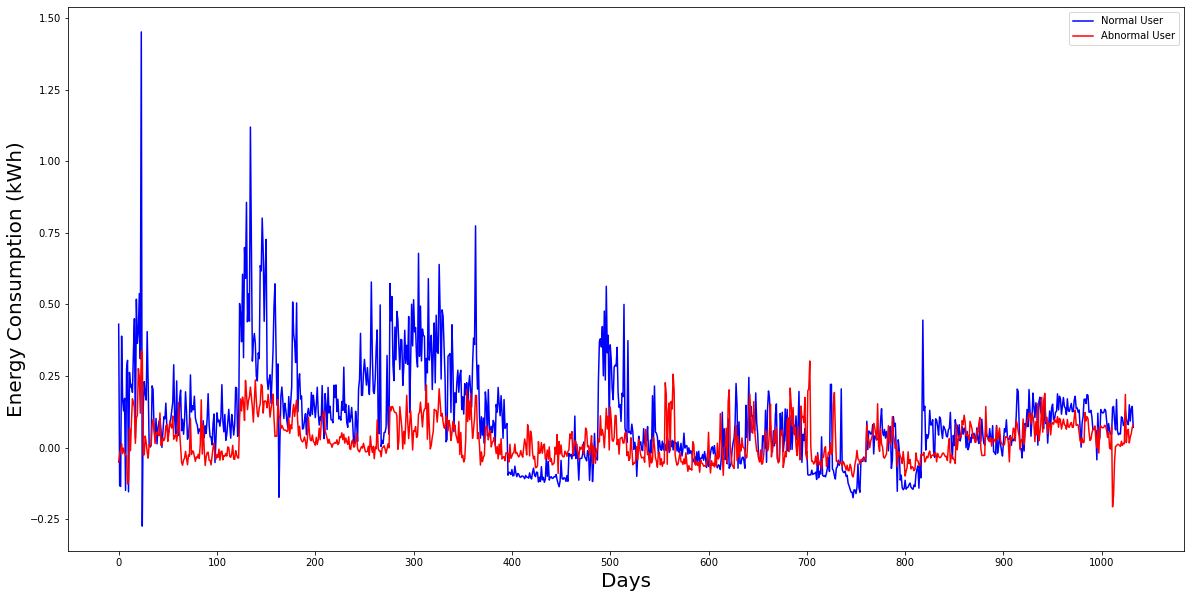

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[17753][:-1], color='blue')
plt.plot(df_1.iloc[4][:-1], color='red')
plt.xticks(range(0, len(df_1.iloc[4][:-1]), 100), range(0, len(df_1.iloc[4][:-1]), 100)) 
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Normal User', 'Abnormal User'])
plt.savefig('plots/data_analysis/1.csv')